# **Installing Necessary Libraries**

Dataset Source: https://www.kaggle.com/datasets/zjjc123/cosmosqa

In [1]:
!pip install -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.2 MB/s eta 0:00:00


In [2]:
!pip install -q git+https://github.com/huggingface/datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


In [3]:
!pip install -q git+https://github.com/huggingface/accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install -q ipython-autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


In [5]:
%load_ext autotime

time: 219 µs (started: 2023-09-08 15:13:36 +00:00)


In [6]:
!pip install -q evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 1.8 MB/s eta 0:00:00
time: 5.32 s (started: 2023-09-08 15:13:36 +00:00)


# **Importing Necessary Libraries**

In [7]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datasets
from datasets import Dataset, DatasetDict

import torch
import evaluate

from dataclasses import dataclass

import transformers
from transformers import AutoTokenizer, AutoModelForMultipleChoice
from transformers import Trainer, TrainingArguments, set_seed
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy

from typing import Optional, Union

pd.set_option('display.max_colwidth', None)

time: 9.18 s (started: 2023-09-08 15:13:41 +00:00)


In [8]:
# Setting Seed
set_seed(42)

time: 5.28 ms (started: 2023-09-08 15:13:50 +00:00)


# **Library Versions**

In [9]:
library_versions = {
    "Python": sys.version.split()[0],
    "NumPy": np.__version__,
    "Pandas": pd.__version__,
    "Datasets": datasets.__version__,
    "Transformers": transformers.__version__,
    "Torch": torch.__version__,
    "Evaluate": evaluate.__version__,
}

for name, version in library_versions.items():
    print(name.rjust(15), ":", version)

         Python : 3.10.12
          NumPy : 1.23.5
         Pandas : 1.5.3
       Datasets : 2.14.6.dev0
   Transformers : 4.34.0.dev0
          Torch : 2.0.1+cu118
       Evaluate : 0.4.0
time: 4.97 ms (started: 2023-09-08 15:13:50 +00:00)


In [10]:
!nvidia-smi

Fri Sep  8 15:13:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Loading Dataset**

In [11]:
!pip install -q opendatasets

time: 5.02 s (started: 2023-09-08 15:13:50 +00:00)


In [12]:
import opendatasets as od

time: 26.4 ms (started: 2023-09-08 15:13:55 +00:00)


In [13]:
od.download("https://www.kaggle.com/datasets/zjjc123/cosmosqa")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drishtishrma
Your Kaggle Key: ··········


100%|██████████| 7.45M/7.45M [00:01<00:00, 5.16MB/s]



time: 2min 49s (started: 2023-09-08 15:13:55 +00:00)


In [14]:
train_ds = pd.read_csv("/content/cosmosqa/train.csv")

train_ds = train_ds.drop(columns=["id"])

train_ds.reset_index(drop=True, inplace=True)

train_ds

,context,question,answer0,answer1,answer2,answer3,label
0,"Good Old War and person L : I saw both of these bands Wednesday night , and they both blew me away . seriously . Good Old War is acoustic and makes me smile . I really can not help but be happy when I listen to them ; I think it 's the fact that they seemed so happy themselves when they played .","In the future , will this person go to see other bands play ?",None of the above choices .,"This person likes music and likes to see the show , they will see other bands play .","This person only likes Good Old War and Person L , no other bands .",Other Bands is not on tour and this person can not see them .,1
1,"I mean it : not one person said ANYTHING to me . They would have if I did something wrong , right ? But , this morning , I got a call from my guy at the temp agency and he said that I was no longer needed in that position , that I did n't need to go out there .",Why might have the temp agency tell me I am not needed at that position ?,The company hiring the temp workers might have had a change of mind .,The temp agency hiring the temp workers might have had a change of mind .,None of the above choices .,I might have had a change of mind working for the company .,0
2,Leaving my shift Thursday day shift I arrived the same time as my partner just after six that evening and before long the radio erupted in dispatch tones . A car fleeing the police has crashed and landed on its roof with four separate people entrapped inside . Our medic unit is dispatched along with multiple other ambulances and Rescue Companies .,What may have caused the radio to erupt with dispatch tones ?,My partner needed a medic unit .,Someone was running from the ambulances after they got into a wreck .,None of the above choices .,Someone was running from the cops and got into a wreck .,3
3,"So , last day in Seattle , and my flight was at 1:30 . I got to chit chat with my old manager ( more like a mentor ) , and left Seattle feeling really good and inspired . .",Why did I chit chat with my old manager ?,Because my flight was at 1:30 .,Because I left Seattle feeling really good and inspired .,Because it 's my last day in Seattle .,Because I enjoy talking to him .,3
4,"Ms. Mumma informed Mr. Dail that evidence had been found in his case . "" I fell out of my chair and burst into tears . Evidence meant I was going home , and I knew that , "" said Mr. Dail . He immediately told Ms. Mumma , "" Test anything and everything you can find .",Why did I burst into tears ?,Because Ms. Mumma was informative .,Because I had an intense emotional response to the new development .,Because Mr. Dail was informed .,Because I fell out of my chair .,1
...,...,...,...,...,...,...,...
25257,My dad in old age ... he would have been wise in some matters . Important matters of the day to day . Wise in his right - brained blueness . Wise as each white hair in his beard .,What may be a fact about their dad ?,He 's a different person now .,He died .,None of the above choices .,He does n't talk to them anymore .,1
25258,"As the house was in the higher part of the town we had the view on the lake from our window :) Again , we got ready and went to the same place where we had the "" Vin d'honneur "" to again have some drinks and snacks with other guests . Gave us some strength before we hit the road . I must say I was n't too chatty ( am I ever ?","Why might we have gone back to the same place we had the "" Vin d'honneur "" .",It 's a place I do n't have to be chatty because it 's loud .,I liked the restaurant by the river and wanted to go back .,We enjoyed the restaurant the first time around so we returned .,I like the food and it helps me sleep when we hit the road .,2
25259,"Then there 's is my baby pitbull . Not to play favorite , but he has managed to find a deeper spot in my heart . He is chocolate and carmel swirled I 'd like to say . He 's never been loud , or obnoxious , or too rowdy , or too lazy .",What is the narrator 

time: 243 ms (started: 2023-09-08 15:16:45 +00:00)


In [15]:
import seaborn as sns

time: 88.9 ms (started: 2023-09-08 15:16:45 +00:00)


# **Word Count Distribution for Context**

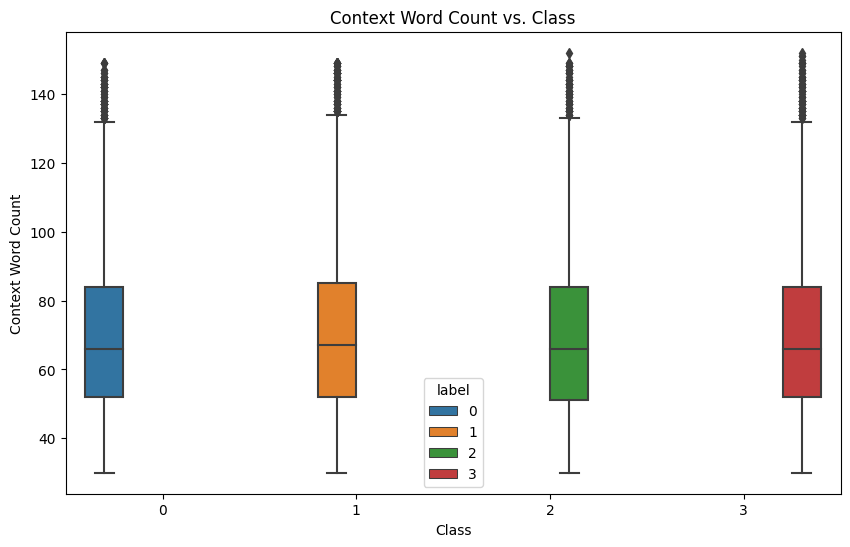

time: 408 ms (started: 2023-09-08 15:16:45 +00:00)


In [16]:

train_ds['context_word_count'] = [len(context.split()) for context in train_ds['context']]

# Box Plot or Violin Plot for Context Word Count vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_ds, x='label', y='context_word_count', hue='label')
plt.xlabel('Class')
plt.ylabel('Context Word Count')
plt.title('Context Word Count vs. Class')
plt.show()


# **Word Count Distribution for Question**

<ipython-input-19-4310e689fb3a>:7: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=train_ds, x='question_word_count', hue='label', bins=20, kde=True, palette=custom_palette)


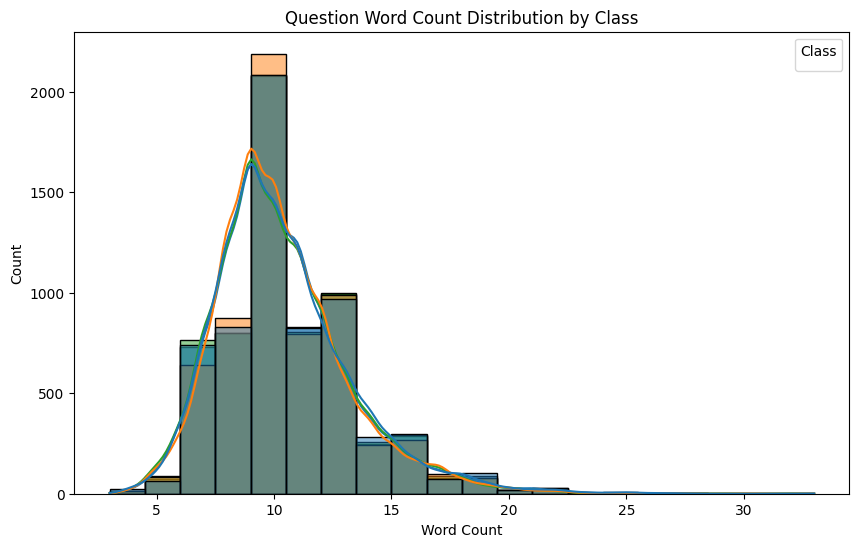

time: 612 ms (started: 2023-09-08 15:18:35 +00:00)


In [19]:
train_ds['question_word_count'] = [len(question.split()) for question in train_ds['question']]
# Define a custom color palette with dark blue, orange, and green
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create the histogram plot with the custom color palette
plt.figure(figsize=(10, 6))
sns.histplot(data=train_ds, x='question_word_count', hue='label', bins=20, kde=True, palette=custom_palette)
plt.title('Question Word Count Distribution by Class')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()


# **Class Distribution**

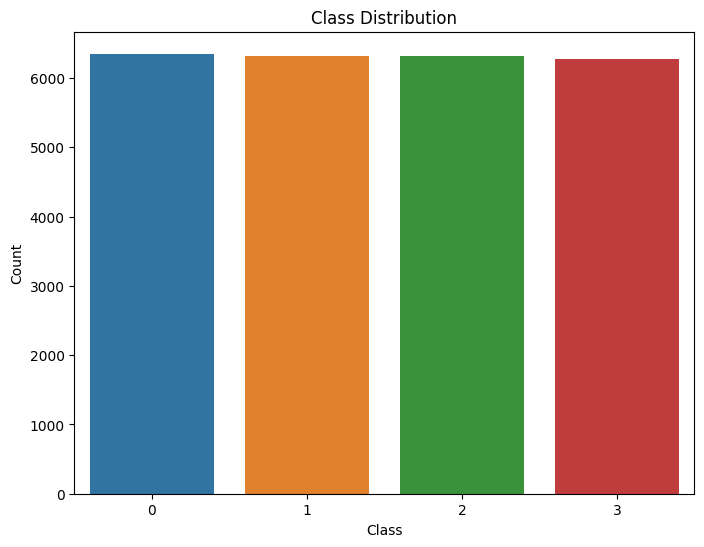

time: 151 ms (started: 2023-09-08 15:18:47 +00:00)


In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_ds, x='label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


  Remark: Seems balanced!

In [21]:
train_ds

,context,question,answer0,answer1,answer2,answer3,label,context_word_count,question_word_count
0,"Good Old War and person L : I saw both of these bands Wednesday night , and they both blew me away . seriously . Good Old War is acoustic and makes me smile . I really can not help but be happy when I listen to them ; I think it 's the fact that they seemed so happy themselves when they played .","In the future , will this person go to see other bands play ?",None of the above choices .,"This person likes music and likes to see the show , they will see other bands play .","This person only likes Good Old War and Person L , no other bands .",Other Bands is not on tour and this person can not see them .,1,65,14
1,"I mean it : not one person said ANYTHING to me . They would have if I did something wrong , right ? But , this morning , I got a call from my guy at the temp agency and he said that I was no longer needed in that position , that I did n't need to go out there .",Why might have the temp agency tell me I am not needed at that position ?,The company hiring the temp workers might have had a change of mind .,The temp agency hiring the temp workers might have had a change of mind .,None of the above choices .,I might have had a change of mind working for the company .,0,62,16
2,Leaving my shift Thursday day shift I arrived the same time as my partner just after six that evening and before long the radio erupted in dispatch tones . A car fleeing the police has crashed and landed on its roof with four separate people entrapped inside . Our medic unit is dispatched along with multiple other ambulances and Rescue Companies .,What may have caused the radio to erupt with dispatch tones ?,My partner needed a medic unit .,Someone was running from the ambulances after they got into a wreck .,None of the above choices .,Someone was running from the cops and got into a wreck .,3,62,12
3,"So , last day in Seattle , and my flight was at 1:30 . I got to chit chat with my old manager ( more like a mentor ) , and left Seattle feeling really good and inspired . .",Why did I chit chat with my old manager ?,Because my flight was at 1:30 .,Because I left Seattle feeling really good and inspired .,Because it 's my last day in Seattle .,Because I enjoy talking to him .,3,40,10
4,"Ms. Mumma informed Mr. Dail that evidence had been found in his case . "" I fell out of my chair and burst into tears . Evidence meant I was going home , and I knew that , "" said Mr. Dail . He immediately told Ms. Mumma , "" Test anything and everything you can find .",Why did I burst into tears ?,Because Ms. Mumma was informative .,Because I had an intense emotional response to the new development .,Because Mr. Dail was informed .,Because I fell out of my chair .,1,58,7
...,...,...,...,...,...,...,...,...,...
25257,My dad in old age ... he would have been wise in some matters . Important matters of the day to day . Wise in his right - brained blueness . Wise as each white hair in his beard .,What may be a fact about their dad ?,He 's a different person now .,He died .,None of the above choices .,He does n't talk to them anymore .,1,40,9
25258,"As the house was in the higher part of the town we had the view on the lake from our window :) Again , we got ready and went to the same place where we had the "" Vin d'honneur "" to again have some drinks and snacks with other guests . Gave us some strength before we hit the road . I must say I was n't too chatty ( am I ever ?","Why might we have gone back to the same place we had the "" Vin d'honneur "" .",It 's a place I do n't have to be chatty because it 's loud .,I liked the restaurant by the river and wanted to go back .,We enjoyed the restaurant the first time around so we returned .,I like the food and it helps me sleep when we hit the road .,2,75,18
25259,"Then there 's is my baby pitbull . Not to play favorite , but he has managed to find a deeper spot in my heart . He is chocolate and carmel swirled I 'd like to say . He 

time: 12.7 ms (started: 2023-09-08 15:18:51 +00:00)


# **Load & Process Evaluation Dataset**

In [22]:
eval_ds = pd.read_csv("/content/cosmosqa/valid.csv")

eval_ds = eval_ds.drop(columns=["id"])

eval_ds.reset_index(drop=True, inplace=True)

eval_ds

,context,question,answer0,answer1,answer2,answer3,label
0,"Do i need to go for a legal divorce ? I wanted to marry a woman but she is not in the same religion , so i am not concern of the marriage inside church . I will do the marriage registered with the girl who i am going to get married . But legally will there be any complication , like if the other woman comes back one day , will the girl who i am going to get married now will be in trouble or Is there any complication ?",Why is this person asking about divorce ?,If he gets married in the church he wo nt have to get a divorce .,He wants to get married to a different person .,He wants to know if he does nt like this girl can he divorce her ?,None of the above choices .,1
1,"Do i need to go for a legal divorce ? I wanted to marry a woman but she is not in the same religion , so i am not concern of the marriage inside church . I will do the marriage registered with the girl who i am going to get married . But legally will there be any complication , like if the other woman comes back one day , will the girl who i am going to get married now will be in trouble or Is there any complication ?",Why is he worried about getting married ?,He was married before and she might come back one day .,He wants the girl he is going to marry get in trouble .,He knows that he will be committing polygamy .,None of the above choices .,0
2,"I was walking home from the store , when I saw an old man laying on the sidewalk , bleeding . The right side of his face was all covered in blood . He was conscious but seemed dazed and probably intoxicated . Nearby there was a young man dialing his cell phone .",What may happen after the young man makes his call ?,An ambulance would likely come to the scene,The taxi would pick up the young man,None of the above choices .,The bus would arrive at the stop soon,0
3,"I was walking home from the store , when I saw an old man laying on the sidewalk , bleeding . The right side of his face was all covered in blood . He was conscious but seemed dazed and probably intoxicated . Nearby there was a young man dialing his cell phone .",What may happen after the young man makes his call ?,None of the above choices .,The bus would arrive at the stop soon,The taxi would pick up the young man,Medical personnel would come to help the old man,3
4,"I was walking home from the store , when I saw an old man laying on the sidewalk , bleeding . The right side of his face was all covered in blood . He was conscious but seemed dazed and probably intoxicated . Nearby there was a young man dialing his cell phone .",What may have happened to the old man ?,He was waiting on a ride,He likely fell on the sidewalk and hit his head while intoxicated,He was waiting on the taxi,None of the above choices .,1
...,...,...,...,...,...,...,...
2980,"Not going in but the antibiotic they put into the IV just kill my arm . And after the procedure was over , I was throwing up all over again . I laid in bed the rest of the afternoon with DH and felt pretty decent by tonight .",What 's a possible reason the writer was throwing up ?,They felt pretty decent by the night .,None of the above choices .,They were not going in .,They have an illness .,3
2981,"This morning was my appointment with the psychiatrist . And may I give Mike another little pat ? He had to get up at 4:25 a.m. yesterday to go into work early to accumulate hours for this day off , and then he stayed an hour and a half late , too , not getting home until 7:00 , and he 's going to have to do that twice more . That 's a high price he 's paying . Anyway , it was worth it .",What 's a possible reason the writer has an appointment with a psychiatrist ?,Because the writer may give Mike another little pat .,None of the above choices .,Because it 's in the morning .,Because Mike had to get up at 4:25 a.m. yesterday .,1
2982,"Those who do n't pass this training will have to give up their jetpack . Fortunately they 'll get their money back . Each jet

time: 38.1 ms (started: 2023-09-08 15:18:54 +00:00)


# **Box Plot or Violin Plot for Context Word Count vs. Class**

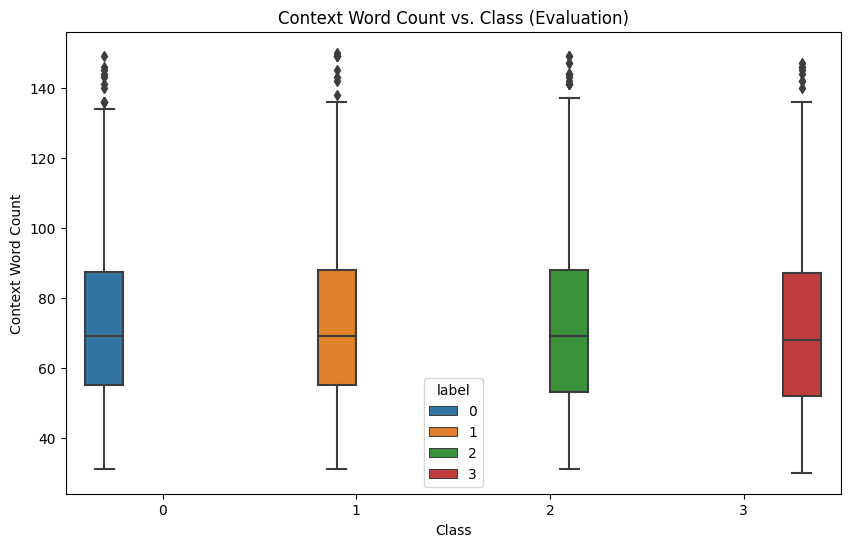

time: 284 ms (started: 2023-09-08 15:19:00 +00:00)


In [23]:
eval_ds['context_word_count'] = [len(context.split()) for context in eval_ds['context']]

# Box Plot or Violin Plot for Context Word Count vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=eval_ds, x='label', y='context_word_count', hue='label')
plt.xlabel('Class')
plt.ylabel('Context Word Count')
plt.title('Context Word Count vs. Class (Evaluation)')
plt.show()

# **Histogram Plot for Question Word Count**

<ipython-input-24-7097fe311887>:5: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=eval_ds, x='question_word_count', hue='label', bins=20, kde=True, palette=custom_palette)


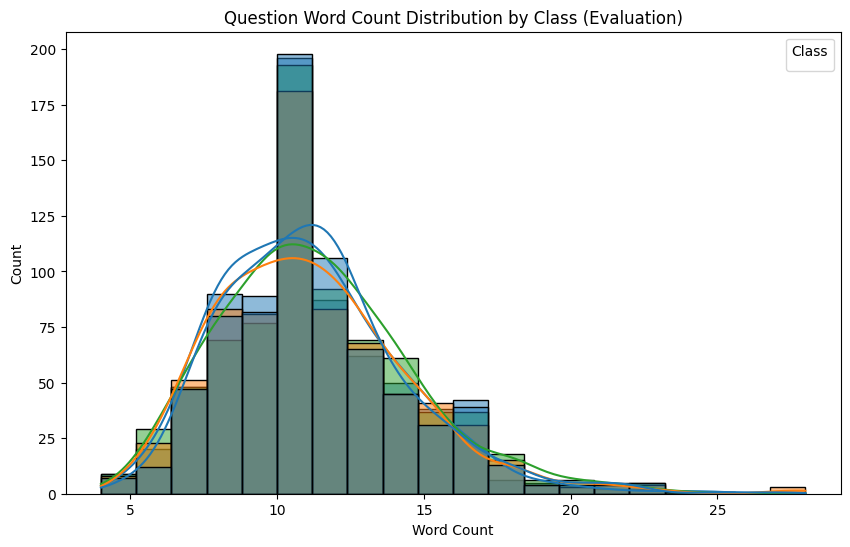

time: 439 ms (started: 2023-09-08 15:19:01 +00:00)


In [24]:
eval_ds['question_word_count'] = [len(question.split()) for question in eval_ds['question']]

# Create the histogram plot for Question Word Count with the custom color palette
plt.figure(figsize=(10, 6))
sns.histplot(data=eval_ds, x='question_word_count', hue='label', bins=20, kde=True, palette=custom_palette)
plt.title('Question Word Count Distribution by Class (Evaluation)')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

# **Convert from DataFrame to Dataset**

In [25]:
train_dataset = Dataset.from_pandas(train_ds)
eval_dataset = Dataset.from_pandas(eval_ds)

time: 41.5 ms (started: 2023-09-08 15:19:21 +00:00)


# **Assign Training & Validation Datasets to DatasetDict**

In [26]:
ds = DatasetDict({
    'train' : train_dataset,
    'eval' : eval_dataset,
})

print("Training Dataset Shape:", ds['train'].shape)
print("Evaluation Dataset Shape:", ds['eval'].shape)

print(ds['train'].features)

Training Dataset Shape: (25262, 9)
Evaluation Dataset Shape: (2985, 9)
{'context': Value(dtype='string', id=None), 'question': Value(dtype='string', id=None), 'answer0': Value(dtype='string', id=None), 'answer1': Value(dtype='string', id=None), 'answer2': Value(dtype='string', id=None), 'answer3': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None), 'context_word_count': Value(dtype='int64', id=None), 'question_word_count': Value(dtype='int64', id=None)}
time: 1.18 ms (started: 2023-09-08 15:19:23 +00:00)


# **Display an Example Sample**

In [27]:
def show_one_example(sample):
    context = sample['context']
    question = sample['question']
    answers = [sample[f'answer{i}'] for i in range(4)]
    label = sample['label']

    print(f"Context: {context} {question}")
    for i, answer in enumerate(answers):
        print(f" {i} - {answer}")

    print(f"\nGround Truth: option {label}")

# Display an Example Sample
show_one_example(ds['train'][2])


Context: Leaving my shift Thursday day shift I arrived the same time as my partner just after six that evening and before long the radio erupted in dispatch tones . A car fleeing the police has crashed and landed on its roof with four separate people entrapped inside . Our medic unit is dispatched along with multiple other ambulances and Rescue Companies . What may have caused the radio to erupt with dispatch tones ?
 0 - My partner needed a medic unit .
 1 - Someone was running from the ambulances after they got into a wreck .
 2 - None of the above choices .
 3 - Someone was running from the cops and got into a wreck .

Ground Truth: option 3
time: 2.18 ms (started: 2023-09-08 15:19:28 +00:00)


# **Basic Values/Constants**

In [28]:
MODEL_CKPT = "bert-base-uncased"
MODEL_NAME = MODEL_CKPT.split("/")[-1] + "-cosmos-mcqa"

STRATEGY = "epoch"
LEARNING_RATE = 2e-5

BATCH_SIZE = 16
NUM_OF_EPOCHS = 5

REPORTS_TO = "tensorboard"

time: 536 µs (started: 2023-09-08 15:19:33 +00:00)


# **Instantiate Tokenizer**

In [29]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CKPT, use_fast=True)

time: 3.53 s (started: 2023-09-08 15:19:35 +00:00)


# **Preprocessing Function**

In [30]:
ending_names = ["answer0", "answer1", "answer2", "answer3"]

def preprocess_function(samples):
    first_sentences = [[context] * len(ending_names) for context in samples['context']]

    question_headers = samples['question']
    second_sentences = [[f"{header} {samples[end][i]}" for end in ending_names] for i, header in enumerate(question_headers)]

    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])

    tokenized_samples = tokenizer(first_sentences, second_sentences, truncation=True)
    return {k: [v[i:i + len(ending_names)] for i in range(0, len(v), len(ending_names))] for k, v in tokenized_samples.items()}

time: 822 µs (started: 2023-09-08 15:19:39 +00:00)


# **Apply Preprocessing Function to Dataset**


In [31]:
encoded_ds = ds.map(preprocess_function, batched=True)

Map:   0%|          | 0/25262 [00:00<?, ? examples/s]

Map:   0%|          | 0/2985 [00:00<?, ? examples/s]

time: 13 s (started: 2023-09-08 15:19:39 +00:00)


In [32]:
encoded_ds['train'].features

{'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'answer0': Value(dtype='string', id=None),
 'answer1': Value(dtype='string', id=None),
 'answer2': Value(dtype='string', id=None),
 'answer3': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'context_word_count': Value(dtype='int64', id=None),
 'question_word_count': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None)}

time: 2.72 ms (started: 2023-09-08 15:19:52 +00:00)


# **Instantiate Model**


In [33]:
model = AutoModelForMultipleChoice.from_pretrained(MODEL_CKPT)

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 2.54 s (started: 2023-09-08 15:19:52 +00:00)


# **Training Arguments**

In [34]:
args = TrainingArguments(
    output_dir=MODEL_NAME,
    evaluation_strategy=STRATEGY,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_OF_EPOCHS,
    report_to=REPORTS_TO,
    logging_first_step=True,
    hub_private_repo=True,
    push_to_hub=True
)

time: 58 ms (started: 2023-09-08 15:19:55 +00:00)


# **DataCollator**

In [35]:
@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad inputs
    for the multiple choices received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()}
                               for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])

        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        # Unflatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

time: 1.44 ms (started: 2023-09-08 15:19:55 +00:00)


# **Create Function to Compute Metrics**

In [36]:
def compute_metrics(predictions):
    preds, labels = predictions
    preds = np.argmax(preds, axis=1)
    return {"accuracy": (preds == labels).astype(np.float32).mean().item()}

time: 387 µs (started: 2023-09-08 15:19:55 +00:00)


# **Instantiate Trainer**

In [37]:
from huggingface_hub import notebook_login
notebook_login()

time: 18.2 ms (started: 2023-09-08 15:19:55 +00:00)


In [38]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=encoded_ds["train"],
    eval_dataset=encoded_ds["eval"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

time: 7.29 s (started: 2023-09-08 15:39:19 +00:00)


# **Train Model**

In [39]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.965200,0.994673,0.592630
2,0.637700,1.013476,0.617755
3,0.339600,1.326288,0.601005
4,0.196500,1.858536,0.591625
5,0.121100,2.030209,0.593970


TrainOutput(global_step=7895, training_loss=0.4755742042407422, metrics={'train_runtime': 3196.1564, 'train_samples_per_second': 39.519, 'train_steps_per_second': 2.47, 'total_flos': 3.907567387224677e+16, 'train_loss': 0.4755742042407422, 'epoch': 5.0})

time: 53min 16s (started: 2023-09-08 15:39:26 +00:00)


# **Evaluate Model**

In [44]:
evaluation_results = trainer.evaluate()

time: 25.5 s (started: 2023-09-08 16:39:45 +00:00)


In [45]:
evaluation_results

{'eval_loss': 2.0302090644836426,
 'eval_accuracy': 0.5939698219299316,
 'eval_runtime': 25.4911,
 'eval_samples_per_second': 117.1,
 'eval_steps_per_second': 7.336,
 'epoch': 5.0}

time: 3.02 ms (started: 2023-09-08 16:40:10 +00:00)


In [46]:
import math

time: 342 µs (started: 2023-09-08 16:40:10 +00:00)


In [47]:
print(f"Perplexity: {math.exp(evaluation_results['eval_loss']):.2f}")

Perplexity: 7.62
time: 495 µs (started: 2023-09-08 16:40:10 +00:00)


# **Push to Hub**

In [48]:
trainer.push_to_hub()

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

'https://huggingface.co/DrishtiSharma/bert-base-uncased-cosmos-mcqa/tree/main/'

time: 46.6 s (started: 2023-09-08 16:40:34 +00:00)


# **Inference**

In [50]:
from transformers import BertTokenizer, BertForMultipleChoice
import torch

time: 582 µs (started: 2023-09-08 16:43:31 +00:00)


In [51]:
# Load the trained model and tokenizer
model = BertForMultipleChoice.from_pretrained("DrishtiSharma/bert-base-uncased-cosmos-mcqa")
tokenizer = BertTokenizer.from_pretrained("DrishtiSharma/bert-base-uncased-cosmos-mcqa")



time: 30.3 s (started: 2023-09-08 16:43:32 +00:00)


In [54]:
def predict_mcq(question, choices):
    # The number of choices
    num_choices = len(choices)

    # Tokenize the question and choices
    inputs = tokenizer(
        text=([question] * num_choices),
        text_pair=choices,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=512
    )
    input_ids = inputs["input_ids"].unsqueeze(0)  # Add an extra dimension for batch size
    attention_mask = inputs["attention_mask"].unsqueeze(0)

    # Get the model outputs (logits)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits

    # Get the choice with the highest logit
    pred_choice = torch.argmax(logits).item()

    return choices[pred_choice]


# Example usage
question = "Who wrote the play 'Romeo and Juliet'?"
choices = ["Charles Dickens", "William Shakespeare", "George Orwell", "J.K. Rowling"]
predicted_answer = predict_mcq(question, choices)

print(f"The predicted answer is: {predicted_answer}")

The predicted answer is: George Orwell
time: 101 ms (started: 2023-09-08 16:48:19 +00:00)


# Remark:

The predicted answer is incorrect! Model didn't perform really wel.